In [1]:
import os

import pandas as pd

from helpers.cell_type_naming import weird_to_nice

In [2]:
import logging

handler = logging.StreamHandler()
handler.setFormatter(logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s'))
logging.getLogger().addHandler(handler)

logger = logging.getLogger(__name__)
logger.setLevel('DEBUG')

In [3]:
!ls -l /mnt/buckets/liulab/csx_experiments/cell_type_grouping/normal

total 24522
-rw-r--r-- 1 jupyter jupyter     4412 Aug 27 00:50 CIBERSORTx_Adjusted.txt
-rw-r--r-- 1 jupyter jupyter  1011450 Aug 27 00:49 CIBERSORTx_Mixtures_Adjusted.txt
-rw-r--r-- 1 jupyter jupyter  4010602 Aug 27 00:48 CIBERSORTx_cell_type_sourceGEP.txt
-rw-r--r-- 1 jupyter jupyter   176002 Aug 27 00:49 CIBERSORTx_screfsampletirosh_inferred_phenoclasses.CIBERSORTx_screfsampletirosh_inferred_refsample.bm.K999.pdf
-rw-r--r-- 1 jupyter jupyter   522710 Aug 27 00:48 CIBERSORTx_screfsampletirosh_inferred_phenoclasses.CIBERSORTx_screfsampletirosh_inferred_refsample.bm.K999.txt
-rw-r--r-- 1 jupyter jupyter      725 Aug 27 00:48 CIBERSORTx_screfsampletirosh_inferred_phenoclasses.txt
-rw-r--r-- 1 jupyter jupyter 19382578 Aug 27 00:48 CIBERSORTx_screfsampletirosh_inferred_refsample.txt
drwxr-xr-x 1 jupyter jupyter        0 Sep 15 18:41 in


In [4]:
!find /mnt/buckets/liulab/csx_experiments/cell_type_grouping/ -name "CIBERSORTx_Adjusted*"

/mnt/buckets/liulab/csx_experiments/cell_type_grouping/combine_lymphocytes/CIBERSORTx_Adjusted.txt
/mnt/buckets/liulab/csx_experiments/cell_type_grouping/combine_t_cells/CIBERSORTx_Adjusted.txt
/mnt/buckets/liulab/csx_experiments/cell_type_grouping/normal/CIBERSORTx_Adjusted.txt


In [5]:
root = "gs://liulab/csx_experiments/cell_type_grouping"

In [6]:
def read_sigmat(experiment):
    filename = "*bm.K999.txt"
#     filename = "CIBERSORTx_Adjusted.txt"
    path = os.path.join(root, experiment, filename)
    logger.debug(f"reading {path}")
    df = pd.read_csv(
        path,
        sep="\t",
        index_col=0
    )
    df.index = df.index.astype(str)
#     df = df[df.columns[:-3]]  # last 3 are stats
    df = df.rename(columns=weird_to_nice)
    return df

In [7]:
sigmat_normal = read_sigmat("normal")

2021-09-15 18:41:11,400 - __main__ - DEBUG - reading gs://liulab/csx_experiments/cell_type_grouping/normal/*bm.K999.txt


In [8]:
sigmat_normal

,Malignant,Endothelial,CAF,T CD8,NK,Macrophage,T CD4,B
NAME,,,,,,,,
A2M,281.650610,293.077009,1.000000,1.000000,1.000000,874.318085,1.000000,1.000000
A4GALT,1.000000,56.578233,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
AARSD1,47.530952,1.000000,29.752152,1.000000,1.000000,1.000000,1.000000,1.000000
ABCA1,1.000000,83.750607,1.000000,1.000000,1.000000,125.979638,1.000000,1.000000
ABCB5,117.846844,1.000000,1.000000,21.130258,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...
ZRSR2,1.000000,1.000000,1.000000,34.301794,69.883443,1.000000,1.000000,1.000000
ZSCAN12,1.000000,1.000000,1.000000,25.889644,1.000000,1.000000,1.000000,19.428974
ZSCAN16,1.000000,1.000000,1.000000,1.000000,212.109844,1.000000,1.000000,1.000000


In [9]:
sigmat_normal

,Malignant,Endothelial,CAF,T CD8,NK,Macrophage,T CD4,B
NAME,,,,,,,,
A2M,281.650610,293.077009,1.000000,1.000000,1.000000,874.318085,1.000000,1.000000
A4GALT,1.000000,56.578233,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
AARSD1,47.530952,1.000000,29.752152,1.000000,1.000000,1.000000,1.000000,1.000000
ABCA1,1.000000,83.750607,1.000000,1.000000,1.000000,125.979638,1.000000,1.000000
ABCB5,117.846844,1.000000,1.000000,21.130258,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...
ZRSR2,1.000000,1.000000,1.000000,34.301794,69.883443,1.000000,1.000000,1.000000
ZSCAN12,1.000000,1.000000,1.000000,25.889644,1.000000,1.000000,1.000000,19.428974
ZSCAN16,1.000000,1.000000,1.000000,1.000000,212.109844,1.000000,1.000000,1.000000


In [10]:
sigmat_t = read_sigmat("combine_t_cells")

2021-09-15 18:41:11,834 - __main__ - DEBUG - reading gs://liulab/csx_experiments/cell_type_grouping/combine_t_cells/*bm.K999.txt


In [11]:
sigmat_lympho = read_sigmat("combine_lymphocytes")

2021-09-15 18:41:11,961 - __main__ - DEBUG - reading gs://liulab/csx_experiments/cell_type_grouping/combine_lymphocytes/*bm.K999.txt


# visualize

In [12]:
import plotly.io
plotly.io.renderers.default = "jupyterlab+png"

import plotly.express as px
import plotly.graph_objects as go

In [13]:
import numpy as np

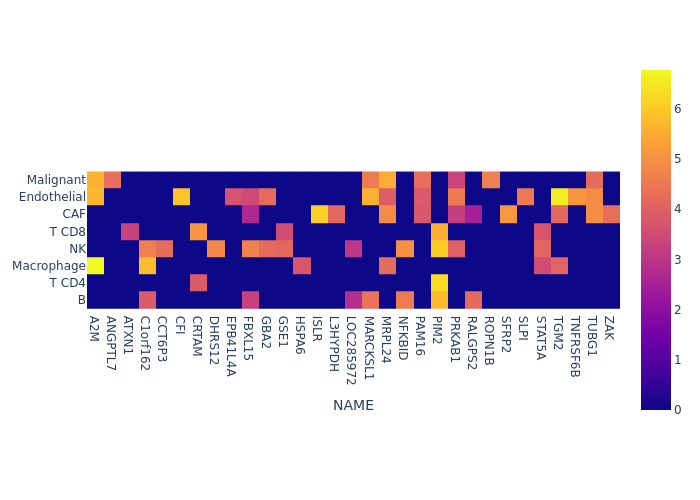

In [14]:
fig = px.imshow(np.log(sigmat_normal.iloc[::100].T))

fig.show()

In [15]:
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



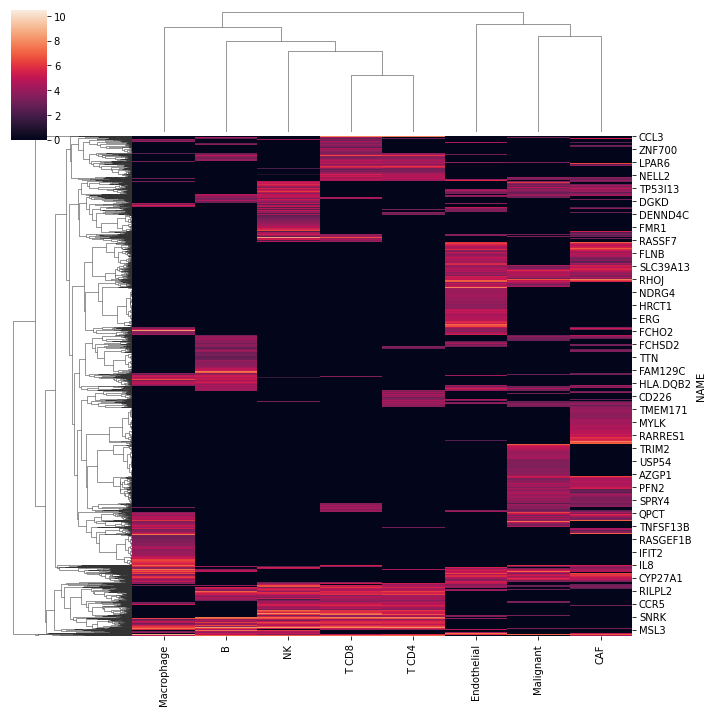

In [16]:
sns.clustermap(np.log(sigmat_normal))

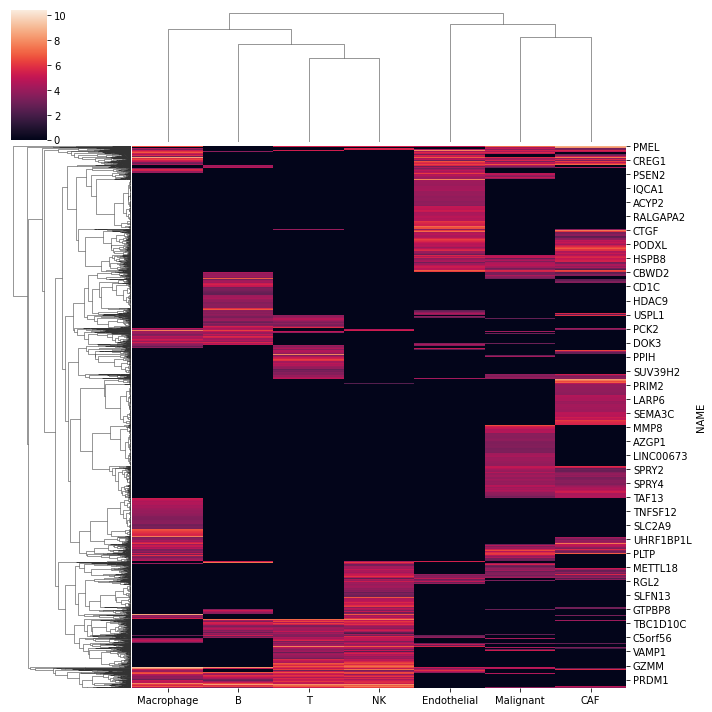

In [17]:
sns.clustermap(np.log(sigmat_t))

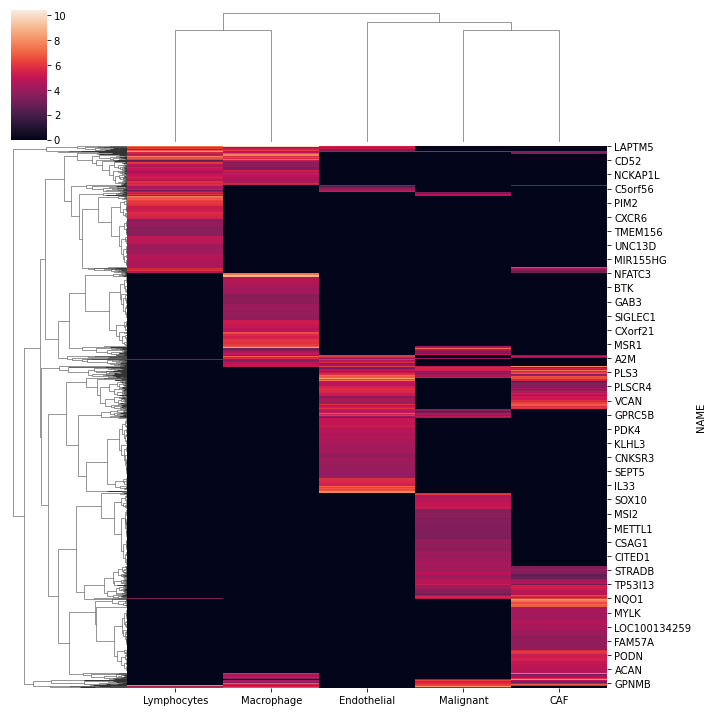

In [18]:
sns.clustermap(np.log(sigmat_lympho))

## fiddling with settings

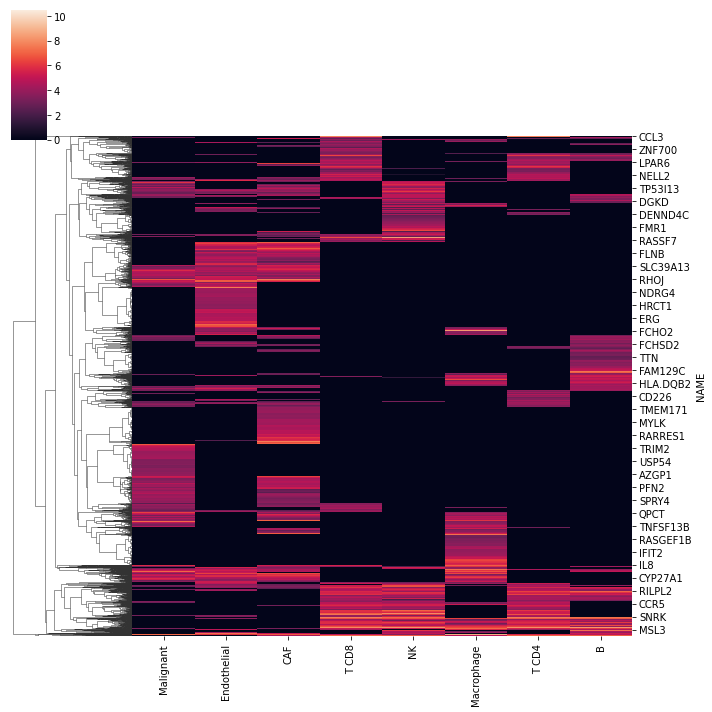

In [19]:
sns.clustermap(np.log(sigmat_normal), col_cluster=False)

## using plotly FigureFactory dendrogram gen

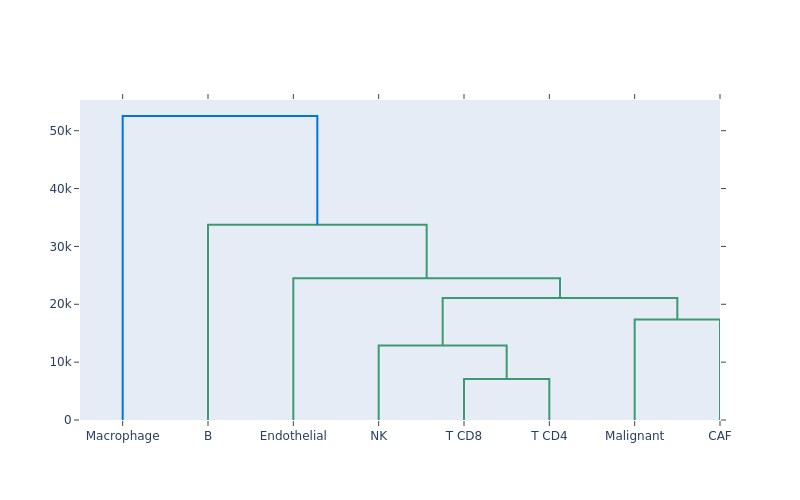

In [20]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

X = sigmat_normal.T
fig = ff.create_dendrogram(X, labels=X.index)
fig.update_layout(width=800, height=500)
fig.show()

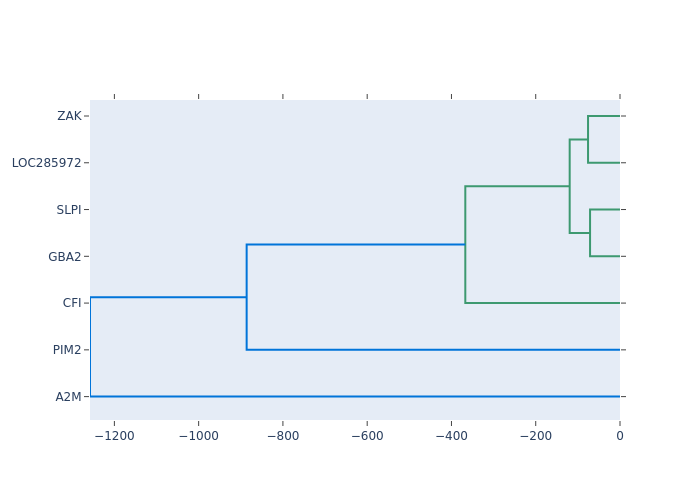

In [21]:
data_array = sigmat_normal.iloc[::500]
labels = data_array.index

dendro_side = ff.create_dendrogram(data_array, orientation='right', labels=labels)

fig = dendro_side

fig.show()

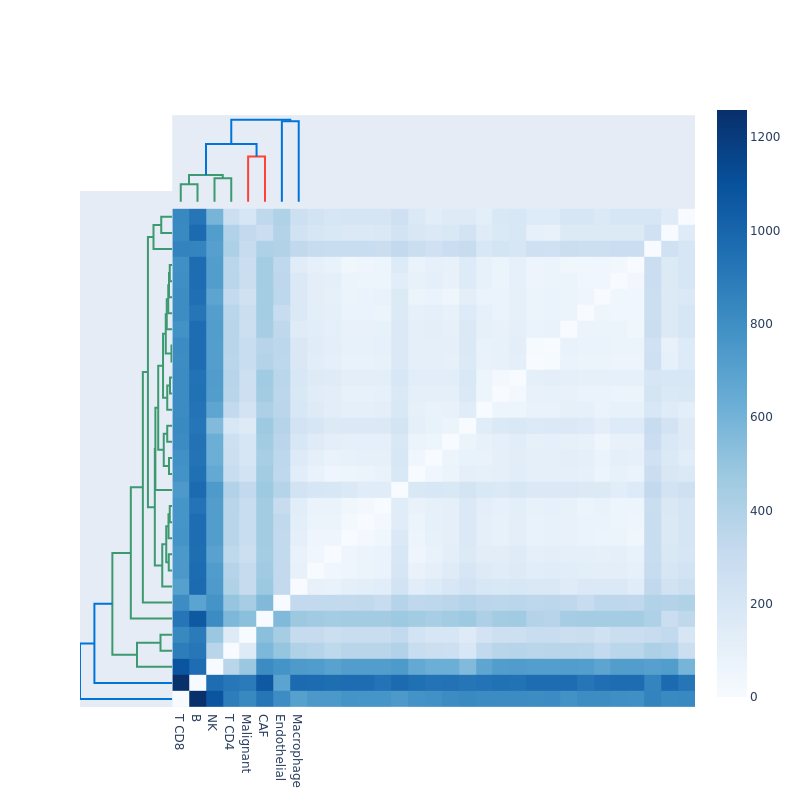

In [22]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

import numpy as np
from scipy.spatial.distance import pdist, squareform


# get data
# data = np.genfromtxt("http://files.figshare.com/2133304/ExpRawData_E_TABM_84_A_AFFY_44.tab",
#                      names=True,usecols=tuple(range(1,30)),dtype=float, delimiter="\t")
# data_array = data.view((np.float, len(data.dtype.names)))
# data_array = data_array.transpose()
data_array = sigmat_normal.iloc[::100]

labels = data_array.index

fig = ff.create_dendrogram(data_array.T, orientation='bottom', labels=data_array.columns)
for i in range(len(fig['data'])):
    fig['data'][i]['yaxis'] = 'y2'

# Create Side Dendrogram
dendro_side = ff.create_dendrogram(data_array, orientation='right')
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'

# Add Side Dendrogram Data to Figure
for data in dendro_side['data']:
    fig.add_trace(data)

# Create Heatmap
dendro_leaves = dendro_side['layout']['yaxis']['ticktext']
dendro_leaves = list(map(int, dendro_leaves))
data_dist = pdist(data_array)
heat_data = squareform(data_dist)
heat_data = heat_data[dendro_leaves,:]
heat_data = heat_data[:,dendro_leaves]

heatmap = go.Heatmap(
    y = dendro_leaves,
    z = heat_data,
    colorscale = 'Blues'
)

heatmap['x'] = fig['layout']['xaxis']['tickvals']
heatmap['y'] = dendro_side['layout']['yaxis']['tickvals']

# Add Heatmap Data to Figure
fig.add_trace(heatmap)

# Edit Layout
fig.update_layout({'width':800, 'height':800,
                         'showlegend':False, 'hovermode': 'closest',
                         })
# Edit xaxis
fig.update_layout(xaxis={'domain': [.15, 1],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'ticks':""})

# Edit xaxis2
fig.update_layout(xaxis2={'domain': [0, .15],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

# Edit yaxis
fig.update_layout(yaxis={'domain': [0, .85],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'showticklabels': False,
                                  'ticks': ""
                        })
# Edit yaxis2
fig.update_layout(yaxis2={'domain':[.825, .975],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

fig